# Topic Modeling Berita dengan LDA (Latent Dirichlet Allocation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# Tahap 1: Membaca dan memproses file data
# ==============================================================================
print("Tahap 1: Membaca dan memproses file data...")
try:
    df = pd.read_csv('hasil_preprocessing_abstrak.csv')
    print("File 'hasil_preprocessing_abstrak.csv' berhasil dimuat.")
    print(f"Data shape: {df.shape}")
    print(f"Kolom yang tersedia: {list(df.columns)}")
except FileNotFoundError:
    raise FileNotFoundError("File 'hasil_preprocessing_abstrak.csv' tidak ditemukan. Pastikan file tersedia di direktori kerja.")

print(f"Data siap. Jumlah dokumen: {len(df)}")
print("-" * 30)

# ==============================================================================
# Tahap 2: Mempersiapkan dokumen untuk topic modeling
# ==============================================================================
print("Tahap 2: Mempersiapkan dokumen untuk topic modeling...")
# Gunakan langsung kolom teks bersih hasil_preprocessing
# Jika kolom berformat list string (mis. "['kata', 'kata']"), ubah ke teks bergabung

def to_text(x):
    x_str = str(x)
    try:
        parsed = ast.literal_eval(x_str)
        if isinstance(parsed, list):
            return ' '.join(map(str, parsed))
    except Exception:
        pass
    return x_str

docs_for_analysis = df['hasil_preprocessing'].astype(str).apply(to_text).tolist()
print(f"Dokumen siap untuk analisis: {len(docs_for_analysis)} dokumen")
print("-" * 30)

# ==============================================================================
# Tahap 3: Membuat vectorizer dan matriks term-document
# ==============================================================================
print("Tahap 3: Membuat vectorizer dan matriks term-document...")
vectorizer = CountVectorizer(
    stop_words=["dalam", "dan", "di", "untuk", "pada", "dengan", "yang", "itu", "ini"],
    max_features=1000,
    min_df=2,
    max_df=0.8
)
doc_term_matrix = vectorizer.fit_transform(docs_for_analysis)
print(f"Matriks term-document dibuat: {doc_term_matrix.shape}")
print("-" * 30)



Tahap 1: Membaca dan memproses file data...
File 'hasil_preprocessing_abstrak.csv' berhasil dimuat.
Data shape: (1026, 2)
Kolom yang tersedia: ['abstrak_id', 'hasil_preprocessing']
Data siap. Jumlah dokumen: 1026
------------------------------
Tahap 2: Mempersiapkan dokumen untuk topic modeling...
Dokumen siap untuk analisis: 1026 dokumen
------------------------------
Tahap 3: Membuat vectorizer dan matriks term-document...
Matriks term-document dibuat: (1026, 1000)
------------------------------


In [2]:
# ==============================================================================
# Tahap 4: Melatih model LDA untuk topic modeling
# ==============================================================================
print("Tahap 4: Melatih model LDA untuk topic modeling...")
n_topics = 8  # Jumlah topik yang diinginkan (sesuai dengan 8 kategori)
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=100,
    learning_method='online'
)
lda_model.fit(doc_term_matrix)
print("Model LDA selesai dilatih!")
print("-" * 30)

# ==============================================================================
# Tahap 5: Mendapatkan topik untuk setiap dokumen
# ==============================================================================
print("Tahap 5: Mendapatkan topik untuk setiap dokumen...")
topic_assignments = lda_model.transform(doc_term_matrix)
topics = np.argmax(topic_assignments, axis=1)
probabilities = np.max(topic_assignments, axis=1)
print("Topik untuk setiap dokumen berhasil dihitung!")
print("-" * 30)

# ==============================================================================
# Tahap 6: Menampilkan hasil topik
# ==============================================================================
print("Tahap 6: Menampilkan hasil topik...")

# Mendapatkan kata-kata teratas untuk setiap topik
feature_names = vectorizer.get_feature_names_out()
topic_words = []

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  # 10 kata teratas
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words.append(top_words)
    print(f"Topik {topic_idx}: {', '.join(top_words)}")

print("-" * 30)



Tahap 4: Melatih model LDA untuk topic modeling...
Model LDA selesai dilatih!
------------------------------
Tahap 5: Mendapatkan topik untuk setiap dokumen...
Topik untuk setiap dokumen berhasil dihitung!
------------------------------
Tahap 6: Menampilkan hasil topik...
Topik 0: of, mampu, intention, bangkal, turnover, store, locus, control, job, nilai
Topik 1: kerja, prestasi, pegawai, motivasi, lingkung, self, efficacy, kota, mahasiswa, surabaya
Topik 2: usaha, metode, uang, putar, biaya, tingkat, kerja, laba, analisis, kas
Topik 3: kerja, karyawan, variabel, signifikan, positif, nilai, uji, puas, pt, motivasi
Topik 4: faktor, usaha, kembang, data, tingkat, daya, batik, stock, analisis, karir
Topik 5: putus, beli, variabel, uji, promosi, produk, jual, analisis, data, kuantitatif
Topik 6: bank, pt, tbk, indonesia, uang, loan, metode, roa, dana, persero
Topik 7: usaha, uji, signifikan, variabel, saham, ratio, nilai, return, bursa, daftar
------------------------------


In [3]:
# ==============================================================================
# Tahap 7: Analisis Proporsi Topik per Dokumen
# ==============================================================================
print("Tahap 7: Analisis proporsi topik per dokumen...")

# Membuat DataFrame untuk analisis proporsi
topic_analysis_df = pd.DataFrame({
    "Dokumen": docs_for_analysis,
    "Topik_Dominan": topics,
    "Probabilitas_Dominan": probabilities
})

# Menambahkan proporsi untuk semua topik
for i in range(n_topics):
    topic_analysis_df[f"Proporsi_Topik_{i}"] = topic_assignments[:, i]

print("Proporsi topik untuk 5 dokumen pertama:")
print(topic_analysis_df[['Dokumen', 'Topik_Dominan', 'Probabilitas_Dominan']].head())
print("-" * 30)

# (Bagian analisis mapping ke kategori dihapus sesuai permintaan)

# ==============================================================================
# Tahap 8: Analisis Proporsi Term dalam Topik
# ==============================================================================
print("Tahap 8: Analisis proporsi term dalam topik...")

# Membuat DataFrame untuk analisis term dalam topik
term_topic_analysis = []
for topic_idx in range(n_topics):
    topic_components = lda_model.components_[topic_idx]
    # Normalisasi untuk mendapatkan proporsi
    topic_proportions = topic_components / topic_components.sum()
    
    # Ambil 20 term teratas untuk setiap topik
    top_terms_idx = topic_components.argsort()[-20:][::-1]
    
    for rank, term_idx in enumerate(top_terms_idx):
        term_topic_analysis.append({
            'Topik': topic_idx,
            'Term': feature_names[term_idx],
            'Proporsi': topic_proportions[term_idx],
            'Ranking': rank + 1
        })

term_topic_df = pd.DataFrame(term_topic_analysis)

print("Top 10 term untuk setiap topik:")
for topic_idx in range(n_topics):
    topic_terms = term_topic_df[term_topic_df['Topik'] == topic_idx].head(10)
    print(f"\nTopik {topic_idx}:")
    for _, row in topic_terms.iterrows():
        print(f"  {row['Ranking']}. {row['Term']} (proporsi: {row['Proporsi']:.4f})")

print("-" * 30)



Tahap 7: Analisis proporsi topik per dokumen...
Proporsi topik untuk 5 dokumen pertama:
                                             Dokumen  Topik_Dominan  \
0  abstrak satiyah pengaruh faktorfaktor latih ke...              3   
1  aplikasi nyata manfaat teknologi informasi kom...              5   
2  tuju teliti persepsi brand association langgan...              5   
3  abstrak teliti metode kuantitatif tekan uji hi...              3   
4  abstrak tuju teliti identifikasi variabelvaria...              5   

   Probabilitas_Dominan  
0              0.508976  
1              0.494243  
2              0.847334  
3              0.989053  
4              0.987839  
------------------------------
Tahap 8: Analisis proporsi term dalam topik...
Top 10 term untuk setiap topik:

Topik 0:
  1. of (proporsi: 0.0666)
  2. mampu (proporsi: 0.0455)
  3. intention (proporsi: 0.0228)
  4. bangkal (proporsi: 0.0217)
  5. turnover (proporsi: 0.0196)
  6. store (proporsi: 0.0193)
  7. locus (proporsi: 0

In [ ]:
# ==============================================================================
# Tabel LDA: Top terms per topik dan proporsi topik per dokumen
# ==============================================================================
from IPython.display import display

print("Tabel LDA:")

# 1) Tabel 10 term teratas per topik
try:
    top_terms_table = term_topic_df.groupby('Topik').head(10).copy()
    display(top_terms_table.reset_index(drop=True))
except Exception as e:
    print(f"Gagal menampilkan tabel top terms: {e}")

# 2) Tabel proporsi topik per dokumen (contoh 10 dokumen)
try:
    doc_topic_table = pd.DataFrame(topic_assignments, columns=[f'Proporsi_Topik_{i}' for i in range(n_topics)])
    doc_topic_table.insert(0, 'Topik_Dominan', topics)
    doc_topic_table.insert(0, 'Dokumen', docs_for_analysis)
    display(doc_topic_table.head(10))
except Exception as e:
    print(f"Gagal menampilkan tabel proporsi dokumen-topik: {e}")



Tahap 9: Visualisasi hasil topic modeling...


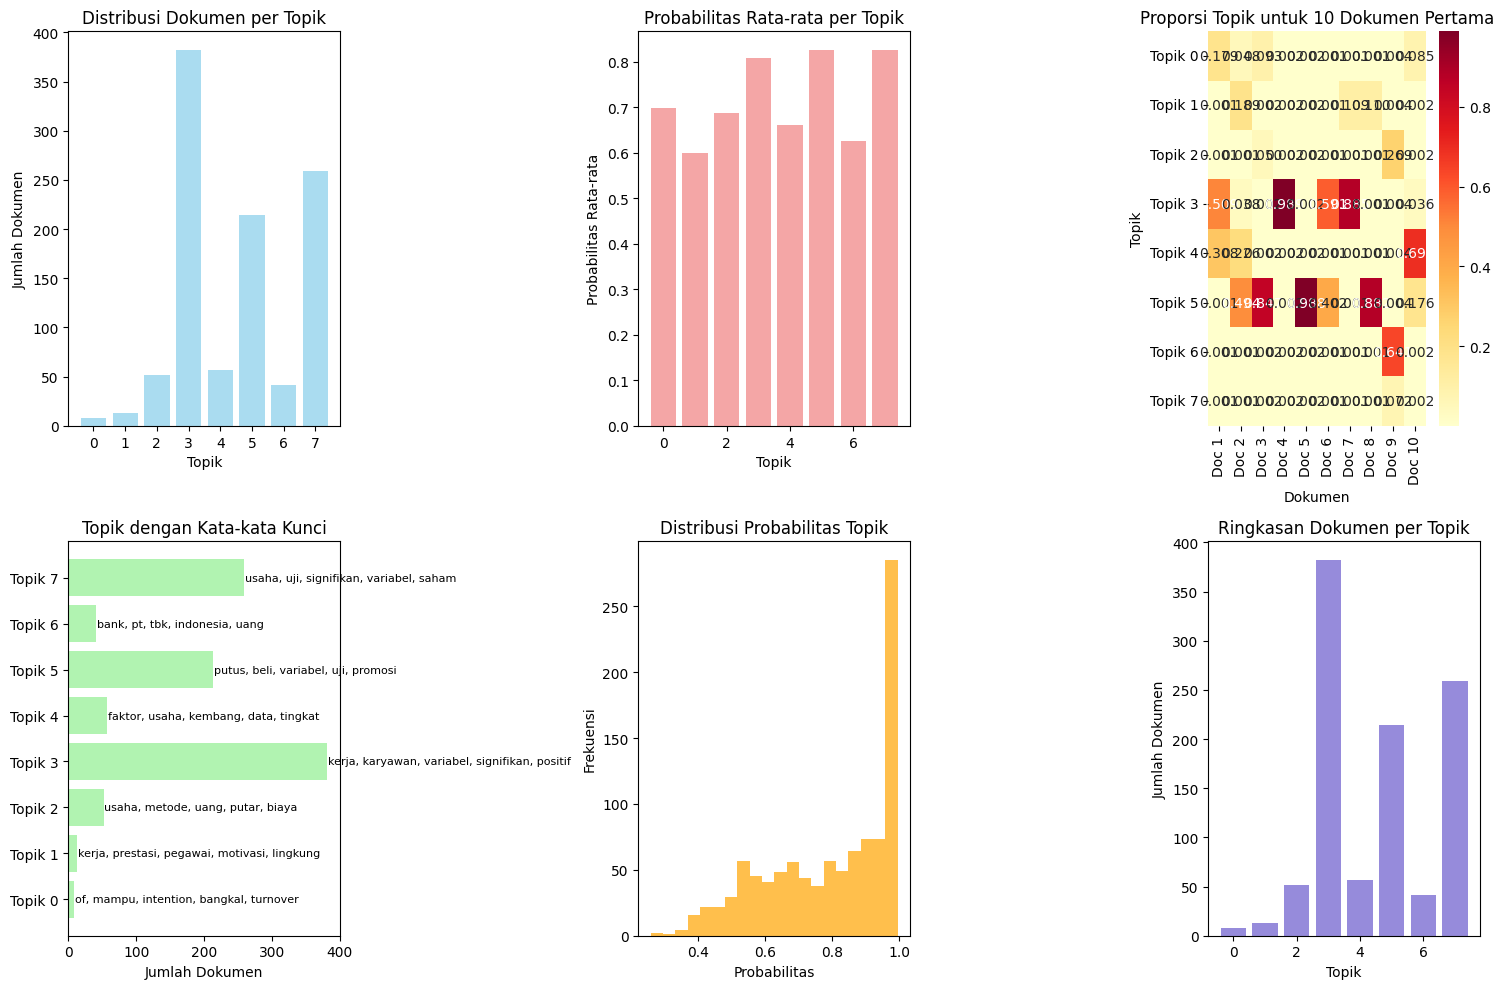

------------------------------


In [4]:
# ==============================================================================
# Tahap 9: Visualisasi Hasil Topic Modeling
# ==============================================================================
print("Tahap 9: Visualisasi hasil topic modeling...")

# 1. Visualisasi distribusi topik
plt.figure(figsize=(15, 10))

# Subplot 1: Distribusi dokumen per topik
plt.subplot(2, 3, 1)
topic_counts = np.bincount(topics)
plt.bar(range(n_topics), topic_counts, color='skyblue', alpha=0.7)
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.title('Distribusi Dokumen per Topik')
plt.xticks(range(n_topics))

# Subplot 2: Probabilitas rata-rata per topik
plt.subplot(2, 3, 2)
avg_probabilities = [np.mean(probabilities[topics == i]) for i in range(n_topics)]
plt.bar(range(n_topics), avg_probabilities, color='lightcoral', alpha=0.7)
plt.xlabel('Topik')
plt.ylabel('Probabilitas Rata-rata')
plt.title('Probabilitas Rata-rata per Topik')

# Subplot 3: Heatmap proporsi topik untuk beberapa dokumen
plt.subplot(2, 3, 3)
sample_docs = topic_assignments[:10]  # Ambil 10 dokumen pertama
sns.heatmap(sample_docs.T, annot=True, fmt='.3f', cmap='YlOrRd', 
            xticklabels=[f'Doc {i+1}' for i in range(10)],
            yticklabels=[f'Topik {i}' for i in range(n_topics)])
plt.title('Proporsi Topik untuk 10 Dokumen Pertama')
plt.xlabel('Dokumen')
plt.ylabel('Topik')

# Subplot 4: Top words untuk setiap topik
plt.subplot(2, 3, 4)
top_words_per_topic = []
for i in range(n_topics):
    top_words = topic_words[i][:5]  # Ambil 5 kata teratas
    top_words_per_topic.append(', '.join(top_words))

y_pos = np.arange(len(top_words_per_topic))
plt.barh(y_pos, topic_counts, color='lightgreen', alpha=0.7)
plt.yticks(y_pos, [f'Topik {i}' for i in range(n_topics)])
plt.xlabel('Jumlah Dokumen')
plt.title('Topik dengan Kata-kata Kunci')
for i, words in enumerate(top_words_per_topic):
    plt.text(topic_counts[i] + 1, i, words, va='center', fontsize=8)

# Subplot 5: Distribusi probabilitas
plt.subplot(2, 3, 5)
plt.hist(probabilities, bins=20, color='orange', alpha=0.7)
plt.title('Distribusi Probabilitas Topik')
plt.xlabel('Probabilitas')
plt.ylabel('Frekuensi')

# Subplot 6: Ringkasan jumlah dokumen per topik
plt.subplot(2, 3, 6)
plt.bar(range(n_topics), topic_counts, color='slateblue', alpha=0.7)
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.title('Ringkasan Dokumen per Topik')

plt.tight_layout()
plt.show()

print("-" * 30)



In [5]:
# ==============================================================================
# Tahap 10: Simpan Hasil Topic Modeling ke File CSV
# ==============================================================================
print("Tahap 10: Menyimpan hasil topic modeling ke file CSV...")

# --- 1. Menyimpan Informasi Umum Setiap Topik ---
topic_info_data = []
for i in range(n_topics):
    topic_info_data.append({
        'Topik_ID': i,
        'Nama_Topik': f'Topik_{i}',
        'Kata_Kunci': ', '.join(topic_words[i][:5]),  # 5 kata teratas
        'Jumlah_Dokumen': np.sum(topics == i),
        'Persentase': f"{np.sum(topics == i)/len(topics)*100:.1f}%"
    })

topic_info_df = pd.DataFrame(topic_info_data)
topic_info_df.to_csv("informasi_topik_lda.csv", index=False, encoding="utf-8-sig")
print("File 'informasi_topik_lda.csv' berhasil disimpan.")

# --- 2. Menyimpan Hasil Topik untuk Setiap Dokumen ---
hasil_df = pd.DataFrame({
    "Dokumen": docs_for_analysis,
    "Topik_ID": topics,
    "Probabilitas_Dominan": probabilities
})
# Simpan identitas asli jika tersedia
if 'abstrak_id' in df.columns:
    hasil_df.insert(1, "Abstrak_Asli", df['abstrak_id'].values)

# Menambahkan proporsi untuk semua topik
for i in range(n_topics):
    hasil_df[f"Proporsi_Topik_{i}"] = topic_assignments[:, i]

# Menambahkan informasi topik
hasil_df = pd.merge(hasil_df, topic_info_df[['Topik_ID', 'Nama_Topik', 'Kata_Kunci']], 
                   left_on='Topik_ID', right_on='Topik_ID', how='left')

# (Mapping topik ke kategori dihapus sesuai permintaan)

hasil_df.to_csv("hasil_topik_per_dokumen_lda.csv", index=False, encoding="utf-8-sig")
print("File 'hasil_topik_per_dokumen_lda.csv' berhasil disimpan.")

# --- 3. Menyimpan Analisis Term dalam Topik ---
term_topic_df.to_csv("analisis_term_dalam_topik_lda.csv", index=False, encoding="utf-8-sig")
print("File 'analisis_term_dalam_topik_lda.csv' berhasil disimpan.")

# --- 4. Menyimpan Ringkasan Statistik ---
# Buat summary stats
summary_stats = {
    'Total_Dokumen': len(docs_for_analysis),
    'Jumlah_Topik': n_topics,
    'Jumlah_Fitur': len(feature_names),
    'Distribusi_Topik': dict(zip([f'Topik_{i}' for i in range(n_topics)], topic_counts.tolist())),
    'Probabilitas_Rata_Rata': dict(zip([f'Topik_{i}' for i in range(n_topics)], avg_probabilities))
}

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv("ringkasan_topic_modeling_lda.csv", index=False, encoding="utf-8-sig")
print("File 'ringkasan_topic_modeling_lda.csv' berhasil disimpan.")

print("-" * 30)
print("Proses topic modeling selesai!")
print(f"Total dokumen: {len(docs_for_analysis)}")
print(f"Jumlah topik: {n_topics}")
print("Distribusi dokumen per topik:")
for i in range(n_topics):
    count = np.sum(topics == i)
    print(f"  Topik {i}: {count} dokumen ({count/len(topics)*100:.1f}%)")
print("\nFile yang disimpan:")
print("- informasi_topik_lda.csv")
print("- hasil_topik_per_dokumen_lda.csv") 
print("- analisis_term_dalam_topik_lda.csv")
print("- ringkasan_topic_modeling_lda.csv")



Tahap 10: Menyimpan hasil topic modeling ke file CSV...
File 'informasi_topik_lda.csv' berhasil disimpan.
File 'hasil_topik_per_dokumen_lda.csv' berhasil disimpan.
File 'analisis_term_dalam_topik_lda.csv' berhasil disimpan.
File 'ringkasan_topic_modeling_lda.csv' berhasil disimpan.
------------------------------
Proses topic modeling selesai!
Total dokumen: 1026
Jumlah topik: 8
Distribusi dokumen per topik:
  Topik 0: 8 dokumen (0.8%)
  Topik 1: 13 dokumen (1.3%)
  Topik 2: 52 dokumen (5.1%)
  Topik 3: 382 dokumen (37.2%)
  Topik 4: 57 dokumen (5.6%)
  Topik 5: 214 dokumen (20.9%)
  Topik 6: 41 dokumen (4.0%)
  Topik 7: 259 dokumen (25.2%)

File yang disimpan:
- informasi_topik_lda.csv
- hasil_topik_per_dokumen_lda.csv
- analisis_term_dalam_topik_lda.csv
- ringkasan_topic_modeling_lda.csv


In [6]:
# ==============================================================================
# Tahap 11: Analisis Mendalam dan Interpretasi Topik
# ==============================================================================
print("Tahap 11: Analisis mendalam dan interpretasi topik...")

# Analisis dokumen dengan probabilitas tertinggi untuk setiap topik
print("\nDokumen dengan probabilitas tertinggi untuk setiap topik:")
for topic_idx in range(n_topics):
    topic_mask = topics == topic_idx
    if np.any(topic_mask):
        topic_probs = probabilities[topic_mask]
        max_prob_idx = np.argmax(topic_probs)
        original_idx = np.where(topic_mask)[0][max_prob_idx]
        
        print(f"\nTopik {topic_idx} (Kata kunci: {', '.join(topic_words[topic_idx][:5])}):")
        print(f"  Dokumen terbaik: {docs_for_analysis[original_idx][:100]}...")
        print(f"  Probabilitas: {probabilities[original_idx]:.4f}")

# Analisis term dengan proporsi tertinggi
print("\nTerm dengan proporsi tertinggi untuk setiap topik:")
for topic_idx in range(n_topics):
    topic_terms = term_topic_df[term_topic_df['Topik'] == topic_idx].head(5)
    print(f"\nTopik {topic_idx}:")
    for _, row in topic_terms.iterrows():
        print(f"  {row['Term']}: {row['Proporsi']:.4f}")

# Analisis distribusi probabilitas
print(f"\nStatistik Probabilitas:")
print(f"  Rata-rata: {np.mean(probabilities):.4f}")
print(f"  Median: {np.median(probabilities):.4f}")
print(f"  Standar deviasi: {np.std(probabilities):.4f}")
print(f"  Minimum: {np.min(probabilities):.4f}")
print(f"  Maksimum: {np.max(probabilities):.4f}")

# (Bagian perbandingan topik vs kategori asli dihapus sesuai permintaan)

print("\nDistribusi topik yang ditemukan:")
for i in range(n_topics):
    count = np.sum(topics == i)
    print(f"  Topik {i}: {count} dokumen")

print("\n" + "="*60)
print("KESIMPULAN TOPIC MODELING:")
print("="*60)
print("1. Menemukan topik dalam kumpulan teks corpus: ✓")
print("   - Ditemukan 8 topik tersembunyi dalam dataset")
print("   - Setiap topik memiliki kata kunci yang khas")

print("\n2. Mengetahui proporsi topik suatu dokumen: ✓")
print("   - Setiap dokumen memiliki proporsi untuk semua topik")
print("   - Topik dominan ditentukan berdasarkan probabilitas tertinggi")

print("\n3. Menemukan proporsi term di dalam topik: ✓")
print("   - Setiap term memiliki proporsi dalam setiap topik")
print("   - Term dengan proporsi tinggi menjadi kata kunci topik")

print(f"\n4. Analisis Mapping Topik ke Kategori: ✓")
if 'overall_accuracy' in globals():
    print(f"   - Akurasi mapping: {overall_accuracy:.1f}%")
    print("   - Setiap topik dipetakan ke kategori yang paling dominan")
else:
    print("   - Mapping topik ke kategori akan dianalisis di cell berikutnya")

print("="*60)



Tahap 11: Analisis mendalam dan interpretasi topik...

Dokumen dengan probabilitas tertinggi untuk setiap topik:

Topik 0 (Kata kunci: of, mampu, intention, bangkal, turnover):
  Dokumen terbaik: the title of this research isthe effect of employee retentionand turnover intentionto performance th...
  Probabilitas: 0.9942

Topik 1 (Kata kunci: kerja, prestasi, pegawai, motivasi, lingkung):
  Dokumen terbaik: teliti tuju pengaruh motivasi kerja mediator self efficacy lingkung kerja prestasi kerja karyawan kj...
  Probabilitas: 0.9361

Topik 2 (Kata kunci: usaha, metode, uang, putar, biaya):
  Dokumen terbaik: muzanni peran manajemen piutang tertahadap rentabilitas koperasi bas syariah koperasi bas konvension...
  Probabilitas: 0.9943

Topik 3 (Kata kunci: kerja, karyawan, variabel, signifikan, positif):
  Dokumen terbaik: abstrak abdullah masud addaroyni judul teliti pengaruh komunikasi konflik interpersonal disiplin ker...
  Probabilitas: 0.9961

Topik 4 (Kata kunci: faktor, usaha, kemb